In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# original Land Bank data retrieved from website
origLBProps = pd.read_csv("Data/CuyahogaLandbankData-20190615-2.csv")

In [3]:
# properties from original land bank wesbite data ran thru NEOCANDO's property data tool ("CURRENT" file export)
origLBPropsCURRENT = pd.read_csv("Data/OrigLandbank-CURRENT-wStatus.csv")

In [4]:
origLBPropsCURRENT

,Status,PARCEL,MYPLACE,LTRANSDT,LCONVAMT,LCONVTYP,LGRANTEE1,LGRANTOR1,LTRANSDT1,LCONVAMT1,...,ZIP,ZIP_CNTY,STFID00_T,GUC,OLD_SIA2,CUYREGION,WARD,CNTYDIS,SIA,TRACT10
0,Vacant lot,001-07-082,<a href=http://neocando.case.edu/cando/propLau...,12/5/2016,$0,Limited Warranty,CUYAHOGA COUNTY LAND REUTILIZATION,"CORSON, JOSEPH, ET AL",10/28/1985,"$31,900",...,44102,Cuyahoga,39035101101,NaN,NaN,West Side of Cleveland,16.0,3,NaN,1011.01
1,Vacant lot,001-08-058,<a href=http://neocando.case.edu/cando/propLau...,2/24/2017,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,"TRESSA, MARGARET A",2/20/2001,"$24,000",...,44102,Cuyahoga,39035101101,NaN,NaN,West Side of Cleveland,16.0,3,NaN,1011.01
2,Pending transfer,001-08-059,<a href=http://neocando.case.edu/cando/propLau...,11/3/2016,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,"FRIERSON, JULIE A",4/29/2003,"$57,700",...,44102,Cuyahoga,39035101101,NaN,NaN,West Side of Cleveland,16.0,3,NaN,1011.01
3,Sched for demolition,001-29-029,<a href=http://neocando.case.edu/cando/propLau...,12/6/2018,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,UNITED ASSETS LLC,6/4/2012,"$5,000",...,44102,Cuyahoga,39035101700,NaN,NaN,West Side of Cleveland,16.0,3,NaN,1017.00
4,Vacant lot,001-30-024,<a href=http://neocando.case.edu/cando/propLau...,4/19/2018,$0,Forfeiture,STATE OF OHIO FORF CV # 879561,"POLING, CASPER N",NaN,NaN,...,44102,Cuyahoga,39035101700,NaN,NaN,West Side of Cleveland,16.0,3,NaN,1017.00
5,Vacant lot,001-30-025,<a href=http://neocando.case.edu/cando/propLau...,6/21/2017,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,"RUFFIN, LAPETHA",2/17/2012,"$4,000",...,44102,Cuyahoga,39035101700,NaN,NaN,West Side of Cleveland,16.0,3,NaN,1017.00
6,Pending transfer,002-01-041,<a href=http://neocando.case.edu/cando/propLau...,10/11/2018,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,"MICIAK, KEVIN",10/20/2000,"$25,000",...,44102,Cuyahoga,39035101200,NaN,Detroit-Shoreway,West Side of Cleveland,15.0,3,Detroit Shoreway,1012.00
7,Pending transfer,002-09-114,<a href=http://neocando.case.edu/cando/propLau...,7/24/2018,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,YOWLER CAROL A,5/28/1993,"$45,000",...,44102,Cuyahoga,39035101200,NaN,Detroit-Shoreway,West Side of Cleveland,15.0,3,Detroit Shoreway,1012.00
8,Vacant lot,002-21-024,<a href=http://neocando.case.edu/cando/propLau...,6/19/2018,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,"ROCHE, ALMA & NELSON ROCHE",8/31/2001,"$68,000",...,44102,Cuyahoga,39035101800,NaN,NaN,West Side of Cleveland,15.0,3,NaN,1018.00
9,Pending transfer,002-22-084,<a href=http://neocando.case.edu/cando/propLau...,4/25/2018,$0,Sheriff,CUYAHOGA COUNTY LAND REUTILIZATION,WHITSITT NEVEN,11/18/1998,"$76,000",...,44102,Cuyahoga,39035101800,NaN,NaN,West Side of Cleveland,15.0,3,NaN,1018.00


In [5]:
# filter Land Bank properties to only include those in the City of Cleveland 
# and with these statuses: Vacant lot, Pending transfer, Sched for demolition, Unavailable - Demo under contract
LBneighborhood_df = origLBPropsCURRENT[["PLACENME", "NEIGHBOR", "Status", "PARCEL"]]
LBneighborhood_df = LBneighborhood_df.loc[LBneighborhood_df["PLACENME"]=="Cleveland city", :]
LBneighborhood_df = LBneighborhood_df.loc[
    (LBneighborhood_df["Status"]=="Vacant lot") |
    (LBneighborhood_df["Status"]=="Pending transfer") |
    (LBneighborhood_df["Status"]=="Sched for demolition") |
    (LBneighborhood_df["Status"]=="Unavailable - Demo under contract"), 
    :]
LBneighborhood_df.head()

# print(len(LBneighborhood_df["NEIGHBOR"]))
# print(len(LBneighborhood_df["PARCEL"]))

,PLACENME,NEIGHBOR,Status,PARCEL
0,Cleveland city,Edgewater,Vacant lot,001-07-082
1,Cleveland city,Edgewater,Vacant lot,001-08-058
2,Cleveland city,Edgewater,Pending transfer,001-08-059
3,Cleveland city,Cudell,Sched for demolition,001-29-029
4,Cleveland city,Cudell,Vacant lot,001-30-024


In [6]:
LBneighborhood_df["COUNT"] = 1

neighborhood_status_group = LBneighborhood_df.groupby(["NEIGHBOR", "Status"])["COUNT"].sum().reset_index()
# neighborhood_status_group["PARCEL"].count_unique()      

# neighborhood_status_group["NEIGHBOR"]
# LBneighborhood_df
neighborhood_status_group.head()


,NEIGHBOR,Status,COUNT
0,Brooklyn Centre,Pending transfer,6
1,Brooklyn Centre,Sched for demolition,3
2,Brooklyn Centre,Vacant lot,8
3,Buckeye-Shaker,Pending transfer,19
4,Buckeye-Shaker,Unavailable - Demo under contract,1


In [7]:
neighborhood_status_group = neighborhood_status_group.set_index("NEIGHBOR")
# BrooklynCentre1 = BrooklynCentre[["Brooklyn Centre"], ["Status"]]
BrooklynCentre = neighborhood_status_group.loc["Brooklyn Centre"]
BrooklynCentreStatus = BrooklynCentre["Status"].tolist()
BrooklynCentre

,Status,COUNT
NEIGHBOR,,
Brooklyn Centre,Pending transfer,6
Brooklyn Centre,Sched for demolition,3
Brooklyn Centre,Vacant lot,8


In [8]:
BrooklynCentreStatus

['Pending transfer', 'Sched for demolition', 'Vacant lot']

<IPython.core.display.Javascript object>


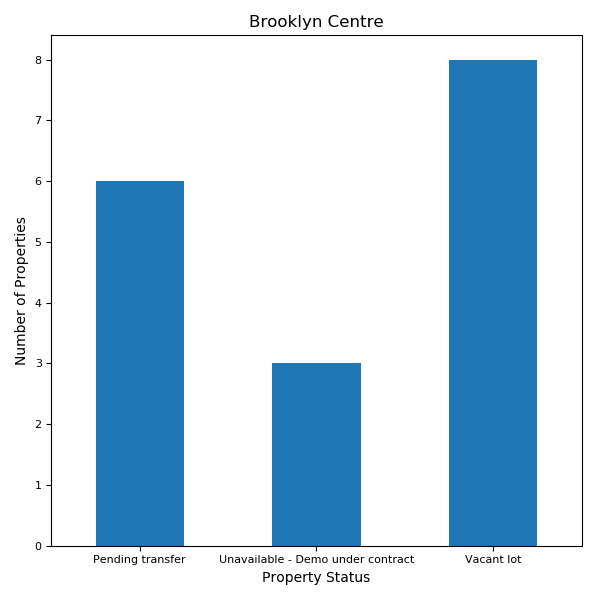

In [116]:
BrooklynCentrePlot = BrooklynCentre.plot(kind="bar", figsize = (6, 6), rot=0, fontsize=8, legend=False)
plt.title("Brooklyn Centre")

plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.tight_layout()
plt.xticks(np.arange(len(BuckeyeShakerStatus)), BuckeyeShakerStatus)
plt.savefig("Output/BrooklynCentre.png")


<IPython.core.display.Javascript object>


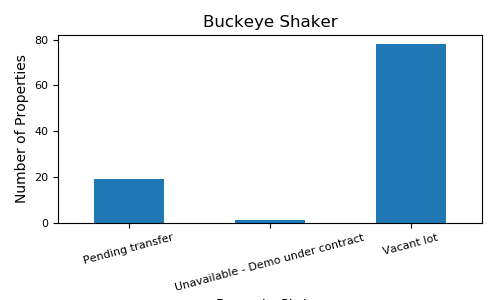

In [112]:
BuckeyeShaker = neighborhood_status_group.loc["Buckeye-Shaker"]
BuckeyeShakerStatus = BuckeyeShaker["Status"].tolist()
BuckeyeShakerPlot = BuckeyeShaker.plot(kind="bar", figsize = (5, 3), rot=15, fontsize=8, legend=False)

plt.title("Buckeye Shaker")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(BuckeyeShakerStatus)), BuckeyeShakerStatus)
plt.savefig("Output/BuckeyeShaker.png")

<IPython.core.display.Javascript object>


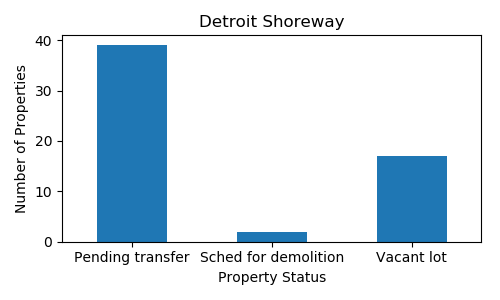

In [109]:
DetroitShoreway = neighborhood_status_group.loc["Detroit-Shoreway"]
DetroitShorewayStatus = DetroitShoreway["Status"].tolist()
DetroitShorewayPlot = DetroitShoreway.plot(kind="bar", figsize = (5, 3), rot=0, legend=False)
plt.title("Detroit Shoreway")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(DetroitShorewayStatus)), DetroitShorewayStatus)
plt.savefig("Output/DetroitShoreway.png")

<IPython.core.display.Javascript object>


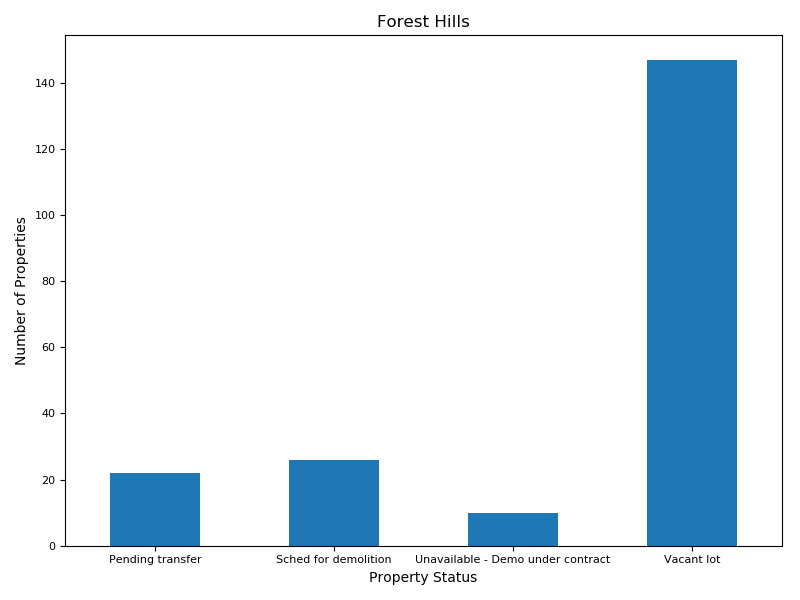

In [118]:
ForestHills = neighborhood_status_group.loc["Forest Hills"]
ForestHillsStatus = ForestHills["Status"].tolist()
ForestHillsPlot = ForestHills.plot(kind="bar", figsize = (8, 6), rot=0, fontsize=8, legend=False)
plt.title("Forest Hills")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(ForestHillsStatus)), ForestHillsStatus)
plt.savefig("Output/ForestHills.png")

<IPython.core.display.Javascript object>


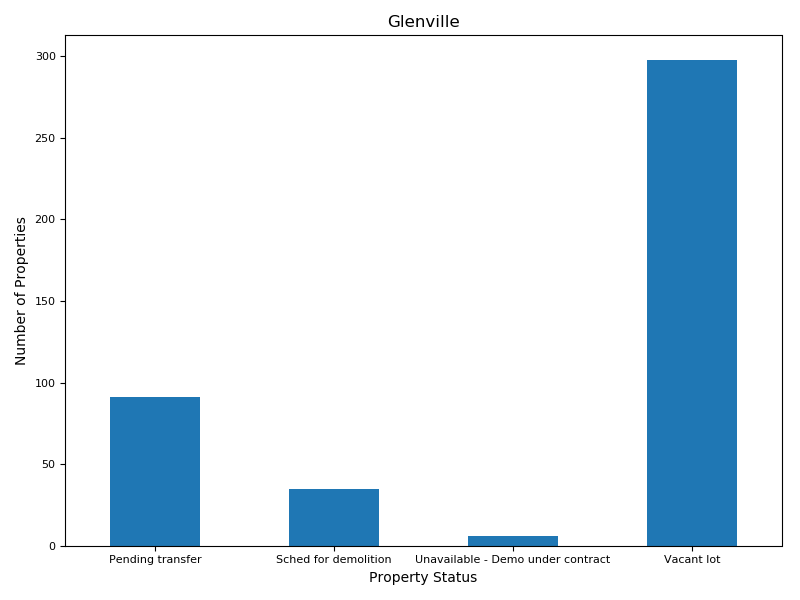

In [119]:
Glenville = neighborhood_status_group.loc["Glenville"]
GlenvilleStatus = Glenville["Status"].tolist()
GlenvillePlot = Glenville.plot(kind="bar", figsize = (8, 6), rot=0, fontsize=8, legend=False)

plt.title("Glenville")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(GlenvilleStatus)), GlenvilleStatus)
plt.savefig("Output/Glenville.png")

<IPython.core.display.Javascript object>


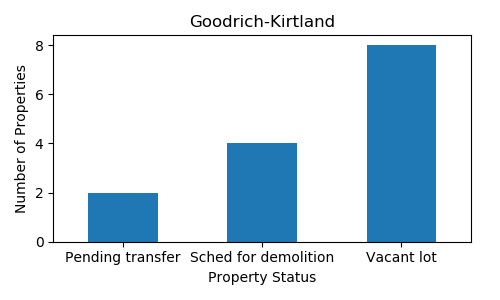

In [105]:
GoodrichKirtland = neighborhood_status_group.loc["Goodrich-Kirtland Park"]
GoodrichKirtlandStatus = GoodrichKirtland["Status"].tolist()
GoodrichKirtlandPlot = GoodrichKirtland.plot(kind="bar", figsize = (5, 3), rot=0, legend=False)

plt.title("Goodrich-Kirtland")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(GoodrichKirtlandStatus)), GoodrichKirtlandStatus)
plt.savefig("Output/GoodrichKirtland.png")

<IPython.core.display.Javascript object>


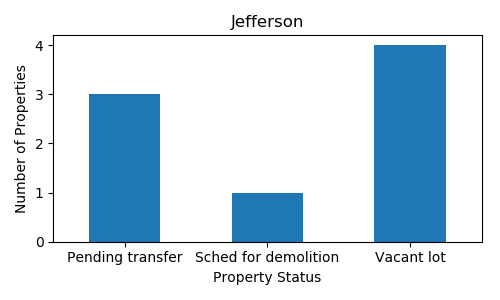

In [104]:
Jefferson = neighborhood_status_group.loc["Jefferson"]
JeffersonStatus = GoodrichKirtland["Status"].tolist()
JeffersonPlot = Jefferson.plot(kind="bar", figsize = (5, 3), rot=0, legend=False)

plt.title("Jefferson")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(JeffersonStatus)), JeffersonStatus)
plt.savefig("Output/Jefferson.png")

<IPython.core.display.Javascript object>


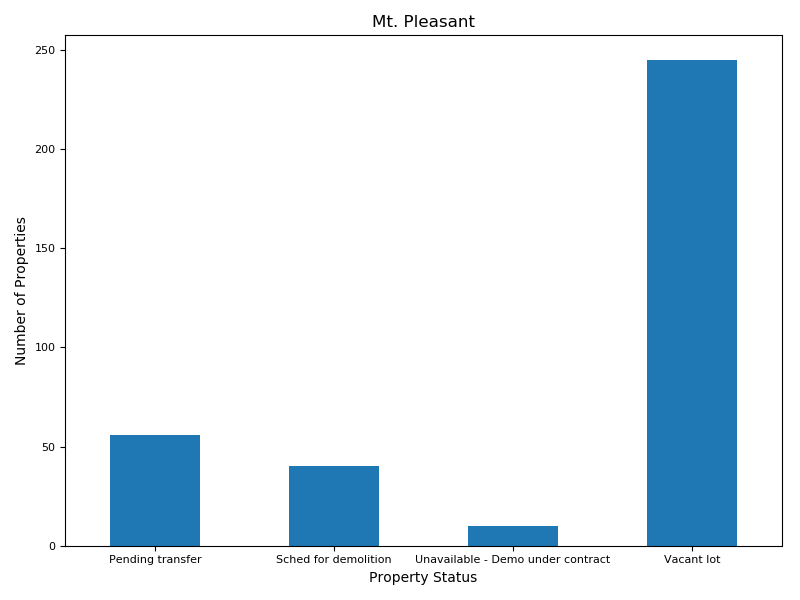

In [121]:
MtPleasant = neighborhood_status_group.loc["Mt. Pleasant"]
MtPleasantStatus = MtPleasant["Status"].tolist()
MtPleasantPlot = MtPleasant.plot(kind="bar", figsize = (8, 6), rot=0, fontsize=8, legend=False)

plt.title("Mt. Pleasant")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(MtPleasantStatus)), MtPleasantStatus)
plt.savefig("Output/MtPleasant.png")

<IPython.core.display.Javascript object>


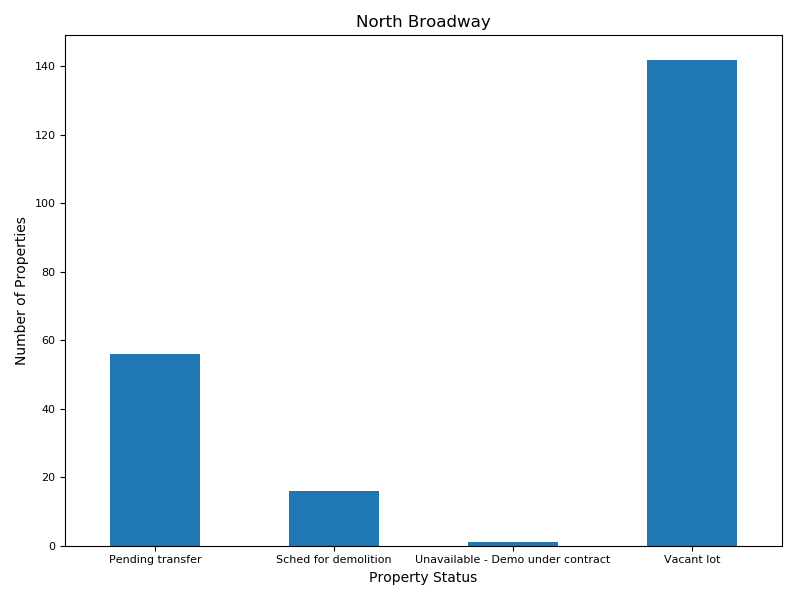

In [122]:
NBroadway = neighborhood_status_group.loc["North Broadway"]
NBroadwayStatus = NBroadway["Status"].tolist()
NBroadwayPlot = NBroadway.plot(kind="bar", figsize = (8, 6), rot=0, fontsize=8, legend=False)

plt.title("North Broadway")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(NBroadwayStatus)), NBroadwayStatus)
plt.savefig("Output/NBroadway.png")

<IPython.core.display.Javascript object>


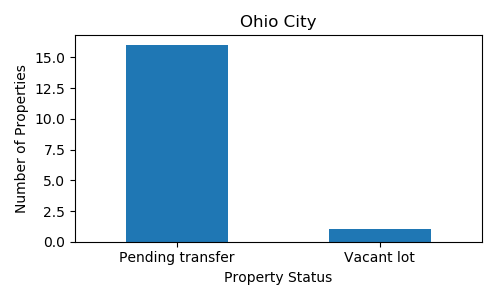

In [99]:
OCity = neighborhood_status_group.loc["Ohio City"]
OCityStatus = OCity["Status"].tolist()
OCityPlot = OCity.plot(kind="bar", figsize = (5, 3), rot=0, legend=False)

plt.title("Ohio City")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(OCityStatus)), OCityStatus)
plt.savefig("Output/OCity.png")

<IPython.core.display.Javascript object>


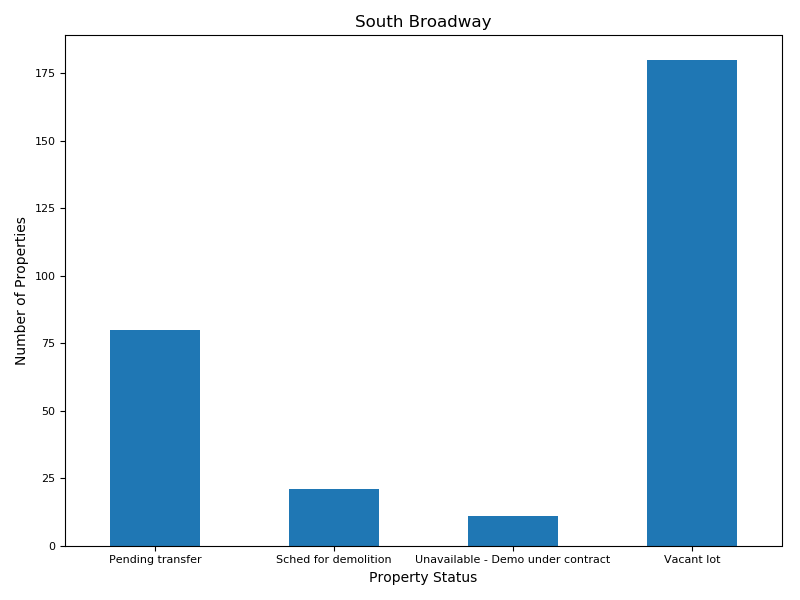

In [123]:
SBroadway = neighborhood_status_group.loc["South Broadway"]
SBroadwayStatus = SBroadway["Status"].tolist()
SBroadwayPlot = SBroadway.plot(kind="bar", figsize = (8, 6), rot=0, fontsize=8, legend=False)

plt.title("South Broadway")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(SBroadwayStatus)), SBroadwayStatus)
plt.savefig("Output/SBroadway.png")

<IPython.core.display.Javascript object>


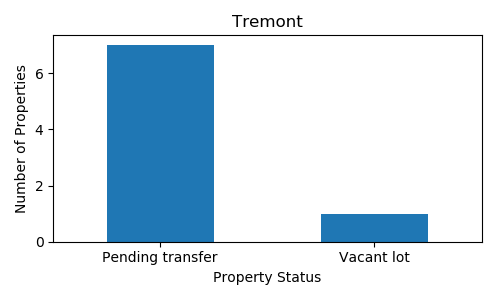

In [95]:
Tremont = neighborhood_status_group.loc["Tremont"]
TremontStatus = Tremont["Status"].tolist()
TremontPlot = Tremont.plot(kind="bar", figsize = (5, 3), rot=0, legend=False)

plt.title("Tremont")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(TremontStatus)), TremontStatus)
plt.savefig("Output/Tremont.png")

<IPython.core.display.Javascript object>


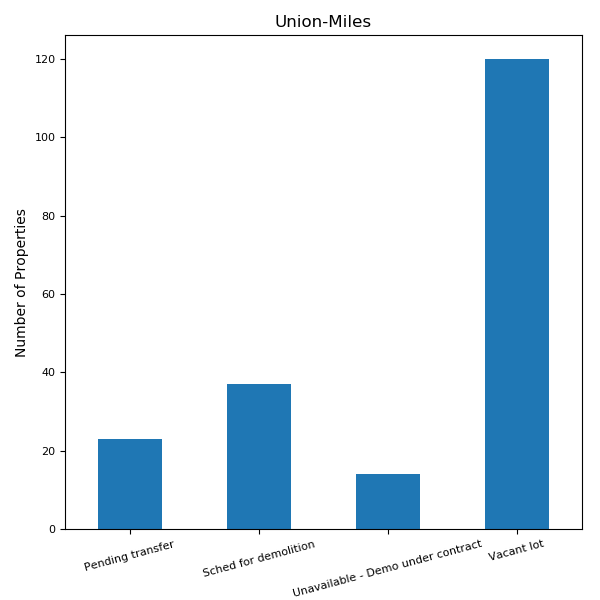

In [94]:
UMiles = neighborhood_status_group.loc["Union-Miles"]
UMilesStatus = UMiles["Status"].tolist()
UMilesPlot = UMiles.plot(kind="bar", figsize = (6, 6), rot=15, fontsize=8, legend=False)

plt.title("Union-Miles")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(UMilesStatus)), UMilesStatus)
plt.savefig("Output/UMiles.png")

<IPython.core.display.Javascript object>


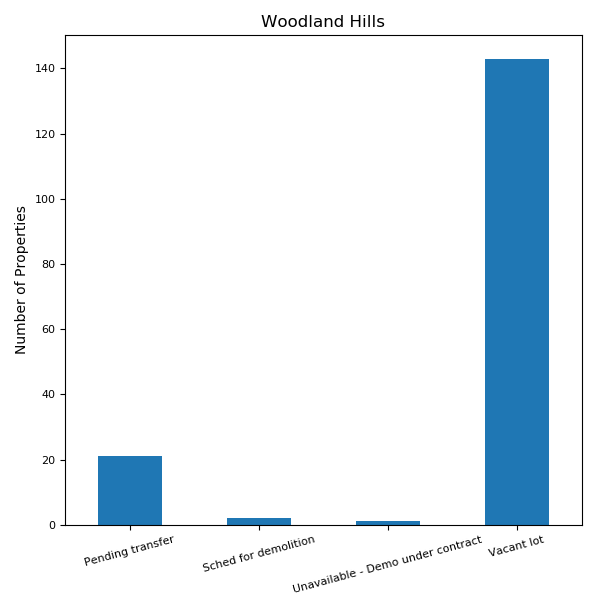

In [92]:
WoodlandHills = neighborhood_status_group.loc["Woodland Hills"]
WoodlandHillsStatus = WoodlandHills["Status"].tolist()
WoodlandHillsPlot = WoodlandHills.plot(kind="bar", figsize = (6, 6), rot=15, fontsize=8, legend=False)

plt.title("Woodland Hills")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(WoodlandHillsStatus)), WoodlandHillsStatus)
plt.savefig("Output/WoodlandHills.png")

<IPython.core.display.Javascript object>


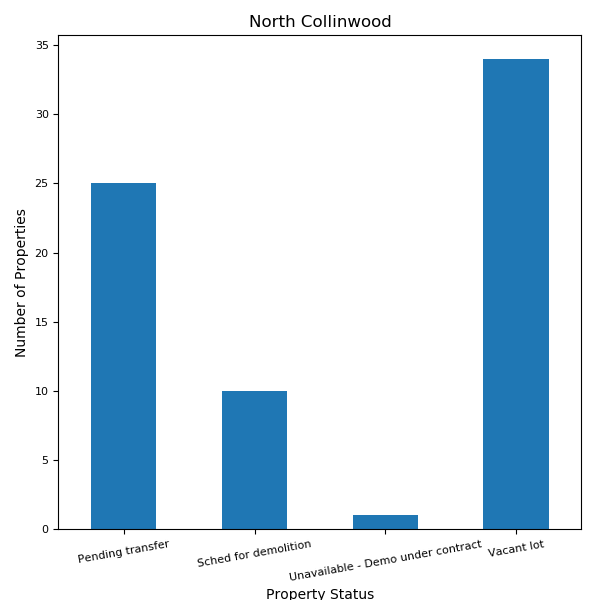

([<matplotlib.axis.XTick at 0x1ef4c093128>,
 <a list of 4 Text xticklabel objects>)

In [90]:
NCollinwood = neighborhood_status_group.loc["North Collinwood"]
NCollinwoodStatus = NCollinwood["Status"].tolist()
NCollinwoodPlot = NCollinwood.plot(kind="bar", figsize = (6, 6), rot=10, fontsize=8, legend=False)

plt.title("North Collinwood")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")
plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(NCollinwoodStatus)), NCollinwoodStatus)
plt.savefig("Output/NCollinwood.png")


<IPython.core.display.Javascript object>


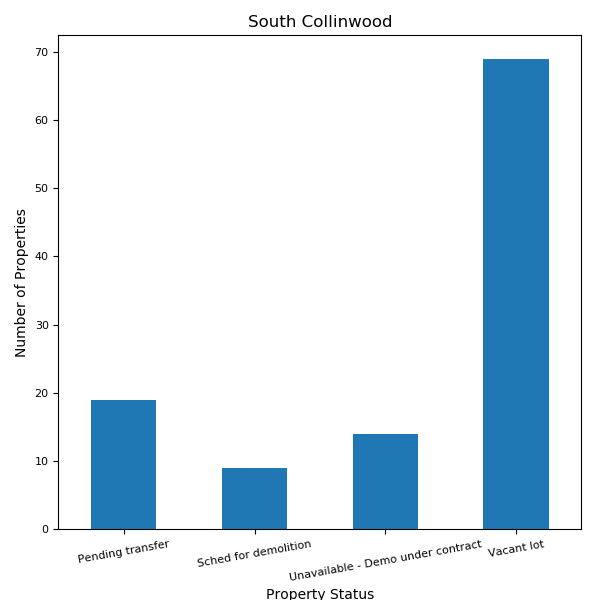

([<matplotlib.axis.XTick at 0x1ef4b9c8f98>,
 <a list of 4 Text xticklabel objects>)

In [85]:
SCollinwood = neighborhood_status_group.loc["South Collinwood"]
SCollinwoodStatus = SCollinwood["Status"].tolist()
SCollinwoodPlot = SCollinwood.plot(kind="bar", figsize = (6, 6), rot=10, fontsize=8, legend=False)

plt.title("South Collinwood")
plt.ylabel("Number of Properties")
plt.xlabel("Property Status")


plt.show()
plt.tight_layout()
plt.xticks(np.arange(len(SCollinwoodStatus)), SCollinwoodStatus)
plt.savefig("Output/SCollinwood.png")

